# Daten herunterladen:

https://drive.google.com/open?id=1kCYv7qOFqk_hldi7rKaBkZovVTyndVfP oder

https://shop.swisstopo.admin.ch/de/products/landscape/names3D

swissNAMES3D_LV95

shp_LV95_LN02

Benötigte Dateien:

swissNAMES3D_PKT.dbf

swissNAMES3D_PKT.prj

swissNAMES3D_PKT.shp

swissNAMES3D_PKT.shx

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
%matplotlib inline
import re

In [2]:
# Daten einlesen
gdf = gpd.read_file('shp_LV95_LN02/swissNAMES3D_PKT.shx')


In [60]:
gdf.head(4)

,UUID,OBJEKTART,OBJEKTKLAS,HOEHE,GEBAEUDENU,NAME_UUID,NAME,STATUS,SPRACHCODE,NAMEN_TYP,NAMENGRUPP,geometry
0,{2FF7E3F1-6BAA-4981-A172-A459E01982E8},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{0642FC92-2FC6-4A4D-AE2B-9115F0D0BA2B},Kleinandelfingen,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2694037.021 1273364.505 389.545)
1,{AA4D0B0F-CA43-4B91-BFC3-32B9F3E2FEDB},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{0642FC92-2FC6-4A4D-AE2B-9115F0D0BA2B},Kleinandelfingen,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2694225.446 1272960.581 386.701)
2,{358C0BD3-3DF7-4A49-B446-F156A2D3D865},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{D723A8F6-7E97-41D0-B042-0935835A017A},Winterthur-Töss,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2695211.064 1260578.998 436.378)
3,{C4D61C3F-4A22-4474-9FD8-9532845AFFF4},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{4EF0E5A1-1AE2-4793-8073-3CA1AF521FCE},Wülflingen,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2694252.651 1263268.638 412.791)


In [4]:
gdf.shape

(308200, 12)

In [5]:
gdf['OBJEKTART'].unique()

array(['Ausfahrt', 'Verzweigung', 'Ein- und Ausfahrt', 'Zollamt 24h 24h',
       'Zollamt 24h eingeschraenkt', 'Zollamt eingeschraenkt',
       'Verladestation', 'Haltestelle Schiff', 'Haltestelle Bahn',
       'Uebrige Bahnen', 'Haltestelle Bus', 'Flurname swisstopo',
       'Lokalname swisstopo', 'Pass', 'Gipfel', 'Hauptgipfel',
       'Alpiner Gipfel', 'Huegel', 'Haupthuegel', 'Felskopf',
       'Strassenpass', 'Quelle', 'Grotte, Hoehle', 'Wasserfall',
       'Denkmal', 'Brunnen', 'Bildstock', 'Aussichtspunkt',
       'Landesgrenzstein', 'Erratischer Block', 'Felsblock', 'Gebaeude',
       'Offenes Gebaeude', 'Sakrales Gebaeude', 'Kapelle', 'Turm'],
      dtype=object)

In [6]:
gdf['OBJEKTKLAS'].unique()

array(['TLM_AUS_EINFAHRT', 'TLM_STRASSENINFO', 'TLM_HALTESTELLE',
       'TLM_FLURNAME', 'TLM_NAME_PKT', 'TLM_EINZELOBJEKT',
       'TLM_MORPH_KLEINFORM_PKT', 'TLM_GEBAEUDE'], dtype=object)

In [7]:
gdf['GEBAEUDENU'].unique()                 ## k_W  = kein Wert

array(['k_W', 'Gasthof abgelegen', 'Schiessstand', 'Stadion',
       'Schutzhuette', 'Stationsgebaeude', 'Observatorium',
       'Aussichtsturm', 'Leuchtturm', 'Sporthalle', 'Wasserturm'],
      dtype=object)

In [8]:
## 123 Enträge in allen Sprachen
#gdf[gdf['OBJEKTART'] == 'Sakrales Gebaeude']

# Daten eingrenzen  
Spalten, Spache Hochdeutsch

In [9]:
## Nur benötigte Spalten
gdf_4spaltig = gdf[['OBJEKTART', 'NAME', 'SPRACHCODE', 'geometry']]

## Spalte Sprachcode als Index
gdf_4spaltig.set_index('SPRACHCODE', inplace=True)

gdf_4spaltig.shape

(308200, 3)

In [10]:
## Nur Zeilen Hochdeutsch
gdf_Hochdeutsch = gdf_4spaltig.loc['Hochdeutsch inkl. Lokalsprachen']

In [11]:
gdf_Hochdeutsch.shape

(206580, 3)

In [12]:
gdf_4spaltig['OBJEKTART'].unique()

array(['Ausfahrt', 'Verzweigung', 'Ein- und Ausfahrt', 'Zollamt 24h 24h',
       'Zollamt 24h eingeschraenkt', 'Zollamt eingeschraenkt',
       'Verladestation', 'Haltestelle Schiff', 'Haltestelle Bahn',
       'Uebrige Bahnen', 'Haltestelle Bus', 'Flurname swisstopo',
       'Lokalname swisstopo', 'Pass', 'Gipfel', 'Hauptgipfel',
       'Alpiner Gipfel', 'Huegel', 'Haupthuegel', 'Felskopf',
       'Strassenpass', 'Quelle', 'Grotte, Hoehle', 'Wasserfall',
       'Denkmal', 'Brunnen', 'Bildstock', 'Aussichtspunkt',
       'Landesgrenzstein', 'Erratischer Block', 'Felsblock', 'Gebaeude',
       'Offenes Gebaeude', 'Sakrales Gebaeude', 'Kapelle', 'Turm'],
      dtype=object)

In [13]:
## Spalte OBJEKTART als Index
gdf_Hochdeutsch.set_index('OBJEKTART', inplace=True)

In [14]:
gdf_3spaltig = gdf_Hochdeutsch.copy()

In [15]:
gdf_3spaltig.head(10)

,NAME,geometry
OBJEKTART,,
Ausfahrt,Kleinandelfingen,POINT Z (2694037.021 1273364.505 389.545)
Ausfahrt,Kleinandelfingen,POINT Z (2694225.446 1272960.581 386.701)
Ausfahrt,Winterthur-Töss,POINT Z (2695211.064 1260578.998 436.378)
Ausfahrt,Wülflingen,POINT Z (2694252.651 1263268.638 412.791)
Ausfahrt,Wülflingen,POINT Z (2694494.016 1263591.783 427.094)
Verzweigung,Winterthur-Nord,POINT Z (2694852.543 1264108.073 438.363)
Verzweigung,Winterthur-Nord,POINT Z (2695091.488 1264580.048 432.101)
Verzweigung,Winterthur-Nord,POINT Z (2695409.576 1264572.464 442.853)
Ausfahrt,Winterthur-Ohringen,POINT Z (2695995.191 1264426.583 458.974)


In [16]:
gdf_3spaltig.shape

(206580, 2)

In [ ]:
#gdf_3spaltig.loc['Gebaeude']  ## nur ein begriff möglich


In [17]:
## Objekte, die uns interessieren
objekte = ['Gebaeude', 'Offenes Gebaeude', 'Sakrales Gebaeude', 'Kapelle']
#objekte = ['Sakrales Gebaeude', 'Kapelle']

gdf_heilige1 = gdf_3spaltig[gdf_3spaltig.index.isin(objekte)]
gdf_heilige1.shape

(4471, 2)

In [18]:
## Objekte, die uns interessieren
#objekte = ['Gebaeude', 'Offenes Gebaeude', 'Sakrales Gebaeude', 'Kapelle']
objekte = ['Sakrales Gebaeude', 'Kapelle']

gdf_heilige2 = gdf_3spaltig[gdf_3spaltig.index.isin(objekte)]
gdf_heilige2.shape

(143, 2)

In [ ]:
gdf_heilige1[gdf_heilige1['NAME'].str.contains("St. ")]

In [ ]:
#gdf_heilige1[gdf_heilige1['NAME'].str.contains("Kloster")]

In [ ]:
## In Spalte suchen

# str.find()

# Plotting

In [41]:
## Ganzer gdf gefiltert nach 'St. ...'
sankt = gdf[gdf['NAME'].str.contains("St. ")]

In [42]:
## nur 645 Einträge landesweit in allen Sprachregionen
len(sankt)

645

In [43]:
sankt

,UUID,OBJEKTART,OBJEKTKLAS,HOEHE,GEBAEUDENU,NAME_UUID,NAME,STATUS,SPRACHCODE,NAMEN_TYP,NAMENGRUPP,geometry
49,{13467D86-8FE6-4CFD-8B05-52810AAAE742},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{E51AC3CA-49CE-4965-BF24-A4995D84540B},St. Gallen-Kreuzbleiche,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2744542.861 1254528.335 639.295)
50,{47C3B0F1-2985-47C7-8DF1-E3D5AFE7FED0},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{E51AC3CA-49CE-4965-BF24-A4995D84540B},St. Gallen-Kreuzbleiche,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2745212.188 1255006.729 651.459)
51,{A36CC2E1-B5D3-4634-8A45-CC268C26437E},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{AC4A5FCB-946B-4423-A0C3-7978DEFE75AC},St. Gallen-Neudorf,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2749089.295 1256231.091 646.966)
52,{A39D2F5A-270D-4EF0-AFAE-1C35E87B22DD},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{AC4A5FCB-946B-4423-A0C3-7978DEFE75AC},St. Gallen-Neudorf,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2748976.254 1256148.678 649.589)
62,{63016EA7-A2BB-4166-AF20-491C364F039B},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{A642D08D-09C4-4EB8-90A2-518FF8C44763},St. Gallen-St. Fiden,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2746876.758 1255394.873 648.912)
63,{847C0907-30D8-4315-8738-A1E6953CB129},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{A642D08D-09C4-4EB8-90A2-518FF8C44763},St. Gallen-St. Fiden,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2747191.315 1255463.711 650.292)
69,{A9DF7DD6-9ADF-4B5A-B6CC-0D824E29F4BC},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{3D10D5B3-1705-490D-A4C0-7D7855AD8369},St. Margrethen,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2766892.230 1258123.016 401.882)
70,{71591F62-4FC7-43E5-9C87-5C4FFDFE65D8},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{3D10D5B3-1705-490D-A4C0-7D7855AD8369},St. Margrethen,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2766829.874 1258189.720 402.162)
89,{7C21E05B-0CE3-4300-8AED-C2EDEC91D555},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{7EBCC193-355C-4C77-B3C2-93F5658939C4},St. Gallen-Winkeln,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2741039.848 1252690.338 643.354)
90,{BA18022D-6BF7-4CB3-9C1A-216CEA4D5760},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{7EBCC193-355C-4C77-B3C2-93F5658939C4},St. Gallen-Winkeln,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2741434.736 1253011.270 639.729)


In [44]:
gdf_kantone = gpd.read_file('Projections/shp/g1k17.shp')

In [45]:
gdf_kantone['KTNAME'].unique()

array(['Zürich', 'Bern / Berne', 'Luzern', 'Uri', 'Schwyz', 'Obwalden',
       'Nidwalden', 'Glarus', 'Zug', 'Fribourg / Freiburg', 'Solothurn',
       'Basel-Stadt', 'Basel-Landschaft', 'Schaffhausen',
       'Appenzell Ausserrhoden', 'Appenzell Innerrhoden', 'St. Gallen',
       'Graubünden / Grigioni / Grischun', 'Aargau', 'Thurgau', 'Ticino',
       'Vaud', 'Valais / Wallis', 'Neuchâtel', 'Genève', 'Jura'],
      dtype=object)

In [46]:
#gdf_heilige1 = gdf_heilige1.to_crs({'init': 'epsg:21781'})
#gdf = gdf.to_crs({'init': 'epsg:21781'})
sankt = sankt.to_crs({'init': 'epsg:21781'})


/home/pc/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


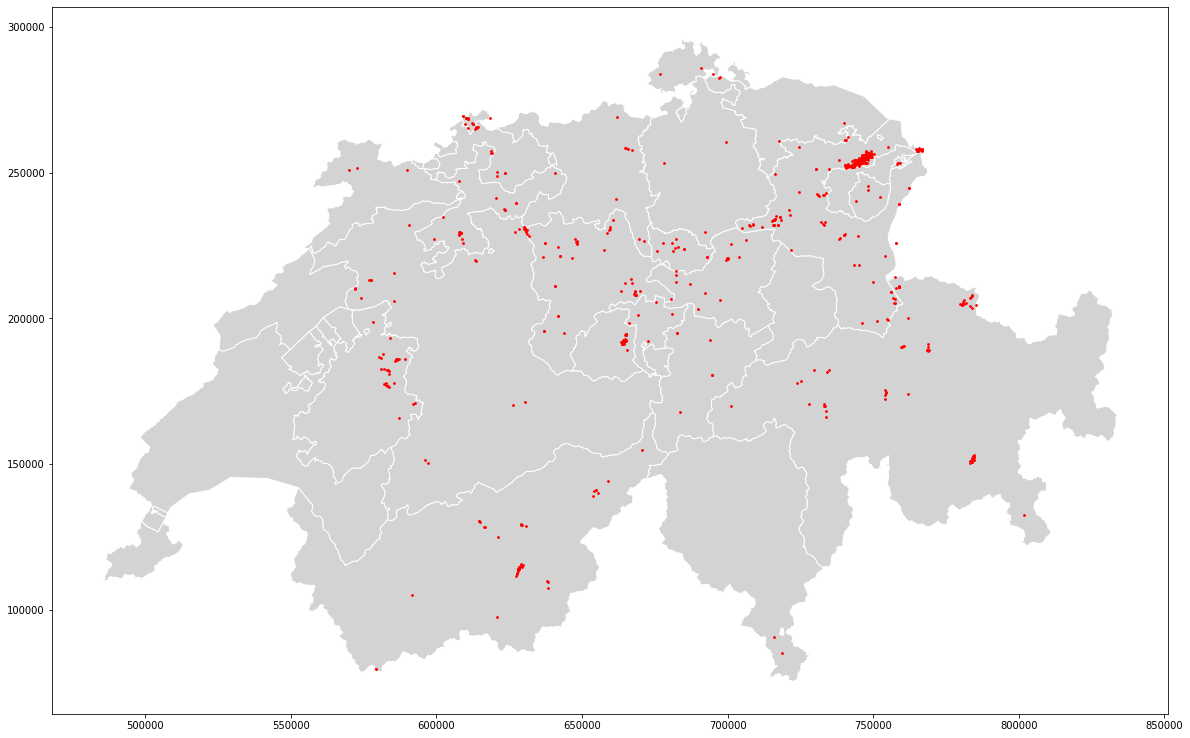

In [47]:
ax = gdf_kantone.plot(figsize=(20,15), color='lightgrey', edgecolor='white')
sankt.plot(markersize=3, color='red', ax=ax)

# Ortstypen farbig unterscheiden

In [ ]:
colors = {
    'retail': 'blue',
    'pronto': 'green',
    'id': 'orange',
    'restaurant': 'red',
    'impo': 'darkblue',
    'vitality': 'darkgreen',
    'bh': 'black',
    'christ': 'black',
    'city': 'black',
    'livique': 'black',
    'togo': 'black',
    'lumimart': 'black',
    'takeit': 'black',
    'marche': 'black',
    'hotel': 'black',
    'capuccini': 'black',
    'burger': 'black',
    'toptip': 'black',
    'cindy': 'black',
    'sapori': 'black',
    'zopf': 'black',
    'karma': 'black',
    'halba': 'black',
    'perpiedi': 'black'
}

In [ ]:
colorlist = gdf_stores['typ'].apply(lambda typ: colors[typ])

In [ ]:
colorlist.value_counts(dropna=False)

# Punkte auf Karte Kanton Zürich

In [25]:
gdf_zh = gdf_kantone[gdf_kantone['KTNAME'] == 'Zürich']

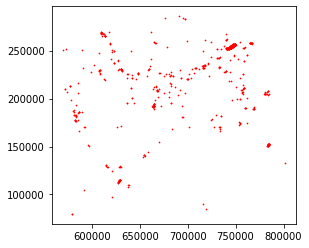

In [26]:
sankt.plot(color='red', markersize=0.5)

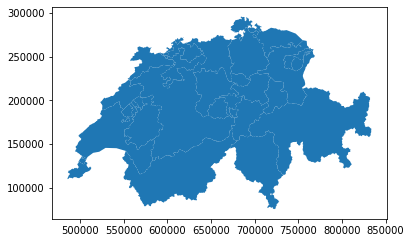

In [49]:
gdf_kantone.plot()

In [52]:
gdf_kantone['KTNAME'].unique()

array(['Zürich', 'Bern / Berne', 'Luzern', 'Uri', 'Schwyz', 'Obwalden',
       'Nidwalden', 'Glarus', 'Zug', 'Fribourg / Freiburg', 'Solothurn',
       'Basel-Stadt', 'Basel-Landschaft', 'Schaffhausen',
       'Appenzell Ausserrhoden', 'Appenzell Innerrhoden', 'St. Gallen',
       'Graubünden / Grigioni / Grischun', 'Aargau', 'Thurgau', 'Ticino',
       'Vaud', 'Valais / Wallis', 'Neuchâtel', 'Genève', 'Jura'],
      dtype=object)

In [51]:
#gdf_merged = gpd.sjoin(gdf_heilige1, gdf_kantone, how='left', op='within')
gdf_merged = gpd.sjoin(sankt, gdf_kantone, how='left', op='within')


In [29]:
gdf_merged.columns

Index(['UUID', 'OBJEKTART', 'OBJEKTKLAS', 'HOEHE', 'GEBAEUDENU', 'NAME_UUID',
       'NAME', 'STATUS', 'SPRACHCODE', 'NAMEN_TYP', 'NAMENGRUPP', 'geometry',
       'index_right', 'KTNR', 'KTNAME', 'GRNR', 'AREA_HA', 'X_MIN', 'X_MAX',
       'Y_MIN', 'Y_MAX', 'X_CNTR', 'Y_CNTR', 'Z_MIN', 'Z_MAX', 'Z_AVG',
       'Z_MED', 'E_MIN', 'E_MAX', 'N_MIN', 'N_MAX', 'E_CNTR', 'N_CNTR'],
      dtype='object')

In [30]:
#gdf_merged.plot(figsize=(10,12))

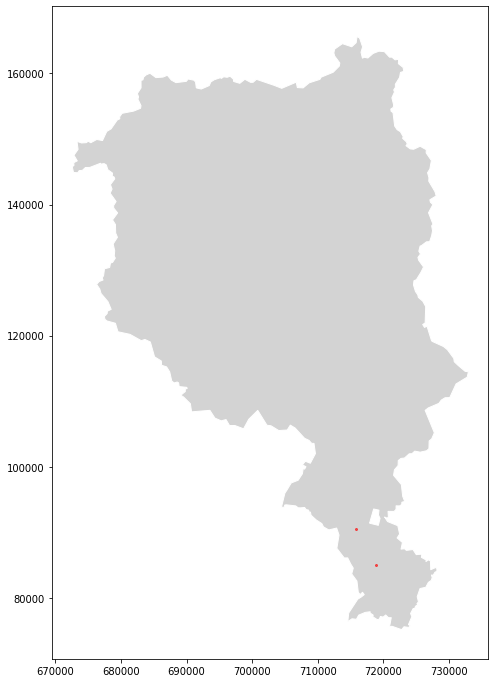

In [57]:
ax = gdf_kantone[gdf_kantone['KTNAME'] == 'Ticino'].plot(color='lightgrey', edgecolor='white', figsize=(10,12))
gdf_merged[gdf_merged['KTNAME'] == 'Ticino'].plot(markersize=4, color='red', alpha=0.6, ax=ax)

In [ ]:
#####zuerich = gdf_heilige1.unary_union

In [ ]:
#zuerich = gdf_zh.contains(gdf_heilige1)

In [ ]:
zuerich = gdf_heilige1.within(gdf_zh)

In [ ]:
#zuerich

In [ ]:
#gdf_zh[gdf_zh.contains(zuerich)].plot(ax=ax, color='darkblue', alpha=0.4)

In [ ]:
#zuerich.within(gdf_zh)


In [ ]:
ax = gdf_kantone[gdf_kantone['KTNAME'] == 'Zürich'].plot(color='lightgrey', edgecolor='white', figsize=(10,12))
zuerich.plot(markersize=0.5, ax=ax)

In [ ]:
#zuerich = gdf_zh.contains(gdf_heilge1)
#gdf_zh.contains(gdf_heilige1).plot(markersize=3, ax=ax)


In [ ]:
#gdf_zh[gdf_zh.contains(zuerich)].plot(ax=ax, color='darkblue', alpha=0.4)

In [ ]:
tracts[tracts.disjoint(near_area)].plot(ax=ax, color='darkblue', alpha=0.4)

In [ ]:
polygon1.contains(punkt1)

In [ ]:
near_area = grocery_stores.buffer(500).unary_union

In [ ]:
# Spalte "time" als Index setzen
df.set_index('time', inplace=True)

In [ ]:
gdf_spaltenliste-loc[]



In [ ]:
df_m.loc[1909:1918]

erstezeile2 = df.loc['2014-10-13'][['ROCHE','NOVARTIS']]

df.sort_values('Approved Amount', ascending=False).head(50)['University'].value_counts()

df.groupby('Funding Instrument Hierarchy')['Approved Amount'].sum()





In [ ]:
## Daten abspeichern
xxxx.to_csv(path, index=False)
